# 程序说明
时间：2016年11月16日

说明：该程序是一个包含两个隐藏层的神经网络。



> Very Deep Convolutional Networks for Large-Scale Image Recognition

> K. Simonyan, A. Zisserman

> arXiv:1409.1556

## 1.加载keras模块

In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 显示图像

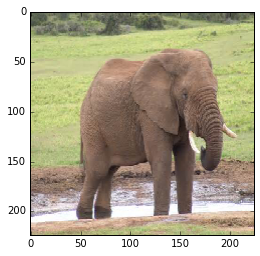

In [2]:
img_path = './data/elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.show()

### 加载VGG16模型（包含全连接层）

In [3]:
model = VGG16(include_top=True, weights='imagenet')
print(type(model))

<class 'keras.engine.training.Model'>


In [4]:
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

print(x.max())

scores = model.predict(x)

151.061


In [10]:
class_table = open('./data/synset_words', 'r')
lines = class_table.readlines()
print("scores type: ", type(scores))
print("scores shape: ", scores.shape)
print(np.argmax(scores))
print('result is ', lines[np.argmax(scores)])
class_table.close()

('scores type: ', <type 'numpy.ndarray'>)
('scores shape: ', (1, 1000))
386
('result is ', 'n02504458 African elephant, Loxodonta africana\n')


In [6]:
del model

### 加载VGG16模型（不包含包含全连接层）

In [7]:
model = VGG16(weights='imagenet', include_top=False)

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

features = model.predict(x)

In [8]:
print(features.shape)

(1, 7, 7, 512)


In [9]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, None, None, 64)1792        input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, None, None, 64)36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, None, None, 64)0           block1_conv2[0][0]               
___________________________________________________________________________________________

### 提取block5_pool层特征

In [10]:
model_extractfeatures = Model(input=model.input, output=model.get_layer('block5_pool').output)

In [11]:
block5_pool_features = model_extractfeatures.predict(x)

In [12]:
print(type(block5_pool_features))
print(block5_pool_features.shape)

<type 'numpy.ndarray'>
(1, 7, 7, 512)


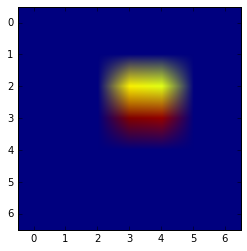

In [13]:
feature_image = block5_pool_features[:,:,:,0].reshape(7,7)
plt.imshow(feature_image)
plt.show()